In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
air_bnb=pd.read_csv("/Users/zoyasyed/Downloads/archive/AB_NYC_2019.csv")
df=air_bnb
df.isna().any()
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [143]:
cols=['availability_365','minimum_nights','reviews_per_month','calculated_host_listings_count']
#Check for na's
df.isnull().sum()
#interpolate na values using interpolate function
df['last_review'] = pd.to_datetime(df['last_review'])

#df.isnull().sum()
#df=df.dropna()
#df.isnull().sum()
#df.size
#df
#Other methods 
#df=df.fillna(0)
#df=df.fillna({'host_name':'xxx','minimum_nights':0,'reviews_per_month':0})

#df=df.interpolate(method='time')

df=df.fillna(method="ffill")
df.isna().any()
df1=df.loc[:,['minimum_nights','reviews_per_month','calculated_host_listings_count']]


df1

df.info()
#plt.scatter(df1.minimum_nights,df1.availability_365)
#df=df.fillna(method="bfill")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48895 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48895 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

/Users/zoyasyed/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


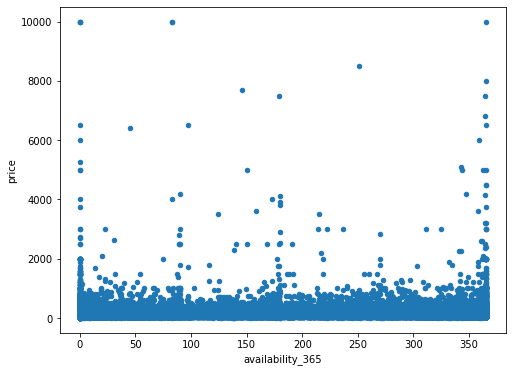

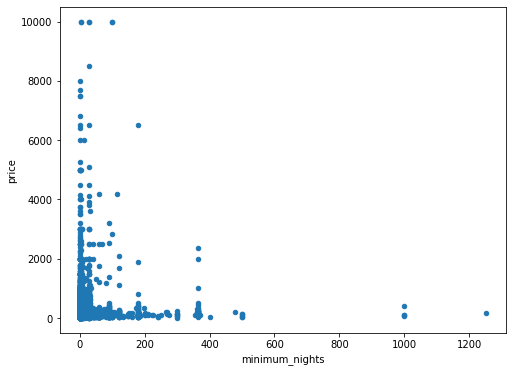

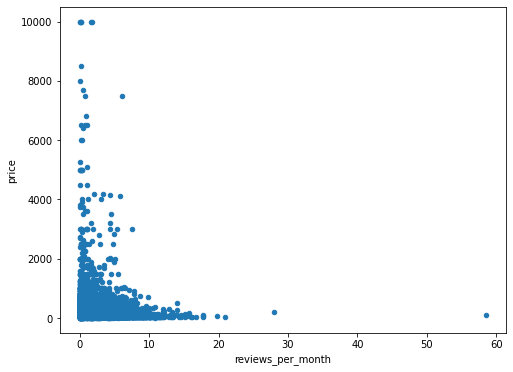

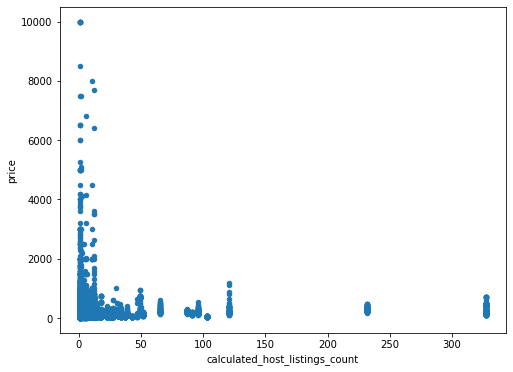

In [144]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for i in cols:
    fig=plt.figure(figsize=(8,6))
    ax=plt.gca()
    df.plot(kind='scatter',x=i,y='price',ax=ax)
df['lnprice']=np.log(df['price'])


<AxesSubplot:>

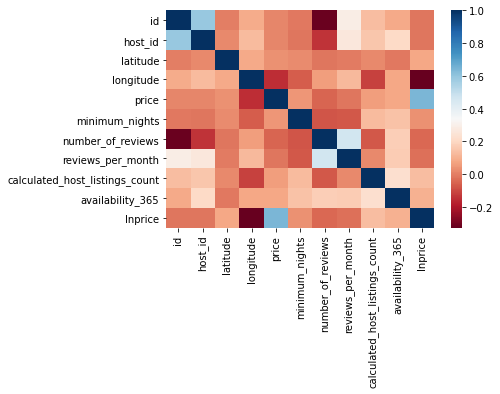

In [145]:

corr=df.corr()
corr
import seaborn as sns
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,cmap='RdBu')

In [146]:
x=df.loc[:,['availability_365','minimum_nights','latitude','reviews_per_month','calculated_host_listings_count']]
y=df['minimum_nights']
std=StandardScaler()
x=std.fit_transform(x)


In [147]:


print("X length:",len(x))
print("Y length:",len(y))
x


X length: 48895
Y length: 48895


array([[ 1.91625031e+00, -2.93996210e-01, -1.49384920e+00,
        -7.05289322e-01, -3.47164266e-02],
       [ 1.84027456e+00, -2.93996210e-01,  4.52436023e-01,
        -6.04177655e-01, -1.56104443e-01],
       [ 1.91625031e+00, -1.96484417e-01,  1.46839948e+00,
        -6.04177655e-01, -1.86451447e-01],
       ...,
       [-6.51730078e-01,  1.44806857e-01,  1.57348017e+00,
        -2.35417457e-01, -1.86451447e-01],
       [-8.41669456e-01, -2.93996210e-01,  5.23773529e-01,
        -2.35417457e-01, -3.47164266e-02],
       [-6.82120378e-01, -1.46083215e-03,  6.43525178e-01,
        -2.35417457e-01, -1.86451447e-01]])

In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [149]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.coef_

array([ 2.41523804e-15,  2.05103398e+01, -2.88657986e-15, -7.10542736e-15,
       -3.55271368e-15])

In [150]:
ypred=lm.predict(x_test)
ypred

array([3., 1., 5., ..., 1., 3., 5.])

In [151]:
cols=['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
for i in cols:
    temp1=df[i].quantile(0.05)
    temp2=df[i].quantile(0.95)
    df1=df[(df[i]<temp1)]
    df1=df[(df[i]>temp2)]
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2404 entries, 0 to 48887
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              2404 non-null   int64         
 1   name                            2404 non-null   object        
 2   host_id                         2404 non-null   int64         
 3   host_name                       2404 non-null   object        
 4   neighbourhood_group             2404 non-null   object        
 5   neighbourhood                   2404 non-null   object        
 6   latitude                        2404 non-null   float64       
 7   longitude                       2404 non-null   float64       
 8   room_type                       2404 non-null   object        
 9   price                           2404 non-null   int64         
 10  minimum_nights                  2404 non-null   int64         
 11  num

(2404, 17)

In [158]:
from sklearn.preprocessing import StandardScaler
df2=df.loc[:,['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
std=StandardScaler()
df1=std.fit_transform(df2)
x=df1
y=df['price']

In [159]:
df1

array([[-2.93996210e-01, -3.20413582e-01, -7.05289322e-01,
        -3.47164266e-02,  1.91625031e+00],
       [-2.93996210e-01,  4.87664928e-01, -6.04177655e-01,
        -1.56104443e-01,  1.84027456e+00],
       [-1.96484417e-01, -5.22433210e-01, -6.04177655e-01,
        -1.86451447e-01,  1.91625031e+00],
       ...,
       [ 1.44806857e-01, -5.22433210e-01, -2.35417457e-01,
        -1.86451447e-01, -6.51730078e-01],
       [-2.93996210e-01, -5.22433210e-01, -2.35417457e-01,
        -3.47164266e-02, -8.41669456e-01],
       [-1.46083215e-03, -5.22433210e-01, -2.35417457e-01,
        -1.86451447e-01, -6.82120378e-01]])

In [160]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [161]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(xtrain,ytrain)
lm.coef_

array([  5.61484492, -13.08461133,  -0.32186773,   7.86535075,
        19.21038422])